## Berechnung des Geotherms in der Kruste
Dies ist ein einfaches Beispiel für die Berechnung des Krustengeotherms mit Python. Ausgehend von einer Oberflächentemperatur von 18°C wird die Temperaturverteilung bis in eine Tiefe von 40km in 100m-Schritten berechnet. Die berechneten Temperaturen werden in einem Vektor (1-dim. Matrix) gespeichert und in einem Diagramm gegen die Tiefe aufgetragen. Für dieses Beispiel braucht man Numpy und zur Darstellung des Diagramms Matplotlib-pyplot.

[Download Python Code](geotherm.py)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Erstellung verschiedener Vektoren (z: Tiefe; k: therm. Leitfähigkeit;
# A: Wärmeproduktion; Q: Wärmefluß; T: Temperatur. Alle sind eine Funktion der Tiefe)

z = np.linspace(0, 40000, 100)
k = np.zeros(z.size)
A = np.zeros(z.size)
Q = np.zeros(z.size)
T = np.zeros(z.size)

Die Abhängigkeit zwischen der Wärmeleitfähigkeit u. Wärmeproduktion mit der Tiefe ist im Detail komplex und von vielen Parametern (insbesondere der chem. Zusammensetzung i.d. Kruste) abhängig. Für diese einfache Berechnung wurden u.g. Annahmen gemacht.

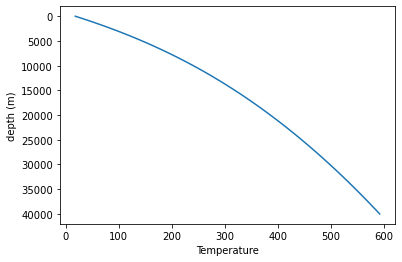

In [2]:
T[0] = 18     # Oberflächentemperatur °C
Q[0] = 6e-2    # Oberflächenwärmeflußdichte W/m2
k = 2 + 5e-5 * z        # W/(m K) Wärmeleitfähigkeit (thermal conductivity) nimmt mit der Tiefe zu
A = 2.5e-6 * np.exp(-1e-4 * z)  # W/m3 e.g. Wärmeproduktion, hier Annahme der exp. Abnahme mit der Tiefe
                                # (z.B. Lachenbruch, 1968 J Geoph Res 73)

# compute the heat flow Q at the bottom of each interval
for i in range(0, z.size-1):
    Q[i+1] = Q[i] - A[i] * (z[i+1] - z[i])
# compute geotherm
for i in range(0, z.size-1):
    T[i+1] = T[i] + (Q[i] * (z[i+1] - z[i])) / k[i] - (A[i]*(z[i+1] - z[i])**2)/2 * k[i]


# Stuff for Plotting the Data
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.set_xlim(0, 1200)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("depth (m)")
ax1.plot(T, z)
plt.gca().invert_yaxis()

plt.show()
